In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import self-made modules
from project1_code.linear_model import LinearModel
from project1_code.make_and_prepare_data import FrankeFunction, create_design_matrix
from project1_code.model_selection import R2, MSE, cross_validation

# Import plotting functions
from project1_code.plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [3]:
# Choose parameters for model
pol_degree = 10
data_size = 600
error_std = 0.1
test_size = 0.2

In [4]:
np.random.seed(5)
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

[0.36482519 0.1781811  1.03084244 0.95042521 1.12474466 0.57385892
 0.42597027 1.2518043  0.35838161 0.23744351 0.37625072 0.42273369
 0.21164733 0.52880235 0.28527288 1.0060456  0.66988571 0.53244329
 0.16498343 0.35505419 0.41672722 0.20171562 0.21934047 0.37133459]
[0.36482519 0.1781811  1.03084244 0.95042521 1.12474466 0.57385892
 0.42597027 1.2518043  0.35838161 0.23744351 0.37625072 0.42273369
 0.21164733 0.52880235 0.28527288 1.0060456  0.66988571 0.53244329
 0.16498343 0.35505419 0.41672722 0.20171562 0.21934047 0.37133459]
[0.36482519 0.1781811  1.03084244 0.95042521 1.12474466 0.57385892
 0.42597027 1.2518043  0.35838161 0.23744351 0.37625072 0.42273369
 0.21164733 0.52880235 0.28527288 1.0060456  0.66988571 0.53244329
 0.16498343 0.35505419 0.41672722 0.20171562 0.21934047 0.37133459]
[0.36482519 0.1781811  1.03084244 0.95042521 1.12474466 0.57385892
 0.42597027 1.2518043  0.35838161 0.23744351 0.37625072 0.42273369
 0.21164733 0.52880235 0.28527288 1.0060456  0.66988571 0.5

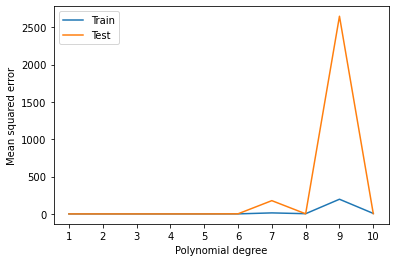

In [12]:
mse_bs_train = []
mse_bs_test = []
mses_test = []
mses_train =[]
for i in range(1, pol_degree + 1):
    X = create_design_matrix(x, y, i)
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size, random_state=1)
    print(z_train)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses_test.append(MSE(z_test, z_pred_test))
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    
#    mse_test, mse_sample = bootstrap(X, z, 5, sample_size=0.8)
#    mse_bs_train.append(mse_sample)
#   mse_bs_test.append(mse_test)
plot_mse_per_poldegree([mses_train, mses_test], ['Train', 'Test'], pol_degree)
#plot_mse_per_poldegree([mses_train, mses_test, mse_bs_train, mse_bs_test], ['Train', 'Test', 'Trainbs', 'Testbs'], pol_degree)

In [5]:
print(mse_bs_test)

[]


In [6]:
mses_test

[0.024432074764141096,
 0.017541744171243323,
 0.007997238242482533,
 0.003992644159099068,
 0.001893464483431372,
 0.0015197977828544935,
 0.0010307135513811753,
 0.0005738496011436454,
 0.0006438983607088796,
 0.0004299634842867288]